# Chercher les fréquences des verbes défectifs dans Lexique3

In [1]:
import codecs,math,pickle,re,math
import pandas as pd
import numpy as np
import itertools as it
import matplotlib as mplt
import matplotlib.pyplot as plt

In [2]:
pd.__version__

u'0.23.1'

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
#sns.palplot(sns.color_palette("hls", 8))
#sns.palplot(sns.color_palette("husl", 8))

In [5]:
repHDR="/Users/gilles/ownCloud/Recherche/Boye/HDR/Memoire/figs/"
repDATA="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Longitudinales/"
nomRepertoire="/Volumes/gilles/Transfert/Copies-iMac-GB/Python/phonemisation/"
nomLexiqueOrg=nomRepertoire+"Lexique380-UTF8.txt"
Lexique3=pd.read_csv(nomLexiqueOrg,sep="\t")
nomVerbes3="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Samples/MGC-171229-Verbes3.pkl"

In [6]:
Lexique3.columns

Index([u'1_ortho', u'2_phon', u'3_lemme', u'4_cgram', u'5_genre', u'6_nombre',
       u'7_freqlemfilms2', u'8_freqlemlivres', u'9_freqfilms2',
       u'10_freqlivres', u'11_infover', u'12_nbhomogr', u'13_nbhomoph',
       u'14_islem', u'15_nblettres', u'16_nbphons', u'17_cvcv', u'18_p_cvcv',
       u'19_voisorth', u'20_voisphon', u'21_puorth', u'22_puphon', u'23_syll',
       u'24_nbsyll', u'25_cv-cv', u'26_orthrenv', u'27_phonrenv',
       u'28_orthosyll', u'29_cgramortho', u'30_deflem', u'31_defobs',
       u'32_old20', u'33_pld20', u'34_morphoder', u'35_nbmorph'],
      dtype='object')

Avec le changement de version de pandas, les anciens pickle ne sont plus compatibles avec la nouvelle version 0.23.1, pd.read_pickle permet de lire un fichier pkl contenant un DataFrame datant d'une version précédente de pandas mais pas un dictionnaire de DataFrame...

In [196]:
verbes3=pd.read_pickle(nomVerbes3)

In [232]:
verbesLex3=verbes3[(verbes3["freq"]>10000)]
verbesLex3.count()

ortho     73539
phono     73539
ext       58209
cs        73539
ms        73539
vs        73539
lexeme    73539
freq      73539
prob      73539
case      73539
dtype: int64

In [200]:
paradigmes=verbesLex3.pivot_table(values='phono', index=['lexeme'], columns=['case'], aggfunc=lambda x: ",".join(x)).reset_index().reindex()
paradigmesFreq=verbesLex3.pivot_table(values="freq", index=['lexeme'], columns=['case']).reset_index().reindex()

In [201]:
paradigmesFreq

case,lexeme,ai1P,ai1S,ai2P,ai2S,ai3P,ai3S,fi1P,fi1S,fi2P,...,ppFP,ppFS,ppMP,ppMS,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S
0,abaisser,NaN,1.700001e+07,NaN,NaN,4.100001e+07,2.640001e+08,NaN,1.700001e+07,NaN,...,1.000017e+06,4.400006e+07,3.700004e+07,2.090003e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,abandonner,2.700001e+07,2.430001e+08,NaN,1.400000e+07,1.580001e+08,9.510009e+08,5.300003e+07,2.800001e+08,1.400005e+07,...,3.970001e+08,1.700001e+09,8.480003e+08,4.648003e+09,NaN,NaN,NaN,1.094776e+07,9.275606e+06,9.041923e+07
2,abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.600001e+07,2.700001e+07,2.440000e+08,NaN,NaN,NaN,NaN,NaN,NaN
3,abattre,NaN,2.700004e+07,NaN,NaN,9.800004e+07,5.410004e+08,1.100001e+07,3.900005e+07,2.600002e+07,...,7.100005e+07,4.620002e+08,4.850001e+08,1.891001e+09,NaN,5.738388e+05,NaN,1.100001e+07,NaN,1.184262e+08
4,abdiquer,NaN,7.000002e+06,NaN,NaN,NaN,2.000002e+07,NaN,NaN,NaN,...,NaN,7.000008e+06,NaN,1.060000e+08,NaN,NaN,NaN,NaN,NaN,NaN
5,aberrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.000004e+06,7.000003e+06,2.800002e+07,NaN,NaN,NaN,NaN,NaN,NaN
7,abjurer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.100003e+07,NaN,NaN,NaN,NaN,NaN,NaN
8,abolir,NaN,NaN,NaN,NaN,NaN,3.775500e+07,NaN,NaN,NaN,...,4.500001e+07,6.000003e+07,1.257257e+07,2.520001e+08,NaN,NaN,NaN,NaN,NaN,NaN
9,abonder,NaN,7.000004e+06,NaN,NaN,NaN,2.700003e+07,NaN,NaN,NaN,...,NaN,NaN,NaN,2.100007e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
etCells=[
    ["pi1P","pi2P"]+["ii"+p+n for p in "123" for n in "SP"],
    ["pi3P"],
    ["pi"+p+"S" for p in "123"],
    ["pP"],
    ["pI2S"],
    ["pI1P","pI2P"],
    ["ps"+p+"S" for p in "123"]+["ps3P"],
    ["ps1P","ps2P"],
    ["inf"],
    ["fi"+p+n for p in "123" for n in "SP"]+["pc"+p+n for p in "123" for n in "SP"],
    ["ai"+p+n for p in "123" for n in "SP"]+["is"+p+n for p in "123" for n in "SP"],
    ["pp"+g+n for g in "MF" for n in "SP"],
        ]

latex2RGB={"orange":(240,134,51),
           "brown!50":(218,192,163),
           "brown":(182,130,75),
           "blue!10":(230,230,253),
           "yellow!50":(255,246,164),
           "blue!25":(191,192,250),
           "teal!50":(141,190,190),
           "blue!50":(128,129,247),
           "cyan!50":(133,198,227),
           "lime":(204,252,81),
           "pink":(246,194,193),
           "magenta!50":(221,151,180),
          }
etRGB=[
        (240,134,51),
        (218,192,163),
        (182,130,75),
        (230,230,253),
        (255,246,164),
        (191,192,250),
        (141,190,190),
        (128,129,247),
        (133,198,227),
        (204,252,81),
        (246,194,193),
        (221,151,180),
       ]
etRGBx=[(r/255.,g/255.,b/255.) for r,g,b in etRGB]

cellColors={}
for nEt,et in enumerate(etCells):
    for c in et:
        cellColors[c]=etRGBx[nEt]

personnes=[p+n for n in "SP" for p in "123" ]
cases=[t+p for t in "pi ii fi pc ps ai is".split(" ") for p in personnes]
cases+="pI2S pI1P pI2P inf pP".split(" ")
cases+=["pp"+g+n for g in "MF" for n in "SP"]


In [137]:
def colorerXTicks(gAX):
    xlabels=gAX.get_xticklabels()
    for xlabel in xlabels:
        xtext=xlabel.get_text()
        xlabel.set_backgroundcolor(cellColors[xtext])
        xlabel.set_family("monospace")
        xlabel.set_size(10)

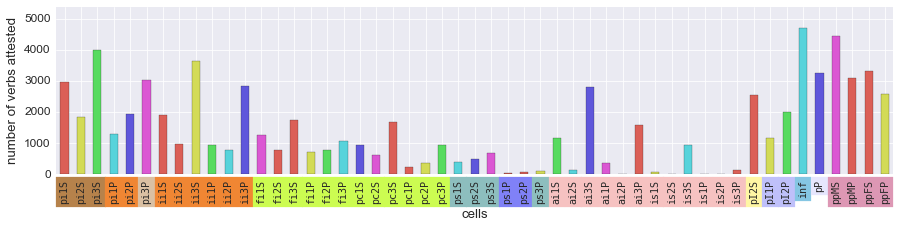

In [144]:
ax=paradigmes[cases].count().plot(kind="bar",figsize=(15,3),color=sns.color_palette("hls"))
#ax.set(xlabel="cells",ylabel="number of verbs attested")
ax.set(ylim=(0,5384),xlabel="cells",ylabel="number of verbs attested")
colorerXTicks(ax)

# Calcul des remplissages

In [153]:
col49=[c for c in paradigmes.columns if c not in "lexeme ppMP ppFS ppFP".split(" ")]
lexNotnull=paradigmes[col49].notnull().sum(axis=1)
lex49=lexNotnull.groupby(lexNotnull).count()
for n in range(50):
    if n not in lex49.index:
        lex49.loc[n]=0
lex49.sort_index(inplace=True)
lex49[lex49.index==1].sum()
#paradigmes.count()

548

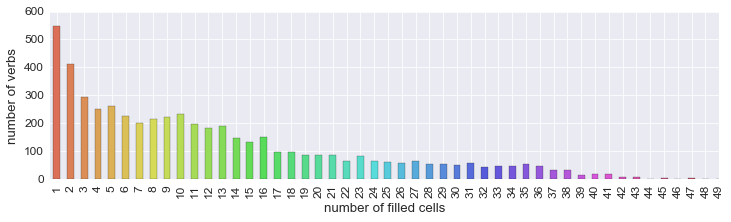

In [154]:
ax=lex49.plot(kind="bar",
           figsize=(12,3),
           color=sns.color_palette("hls", 49),
                                  )
ax.set(xlim=(0.5,49),ylim=(0,600),xlabel="number of filled cells",ylabel="number of verbs",
#       title="Verbs in Lexique3",
      )
plt.show()

In [155]:
lexNull=paradigmes[col49].isnull().sum(axis=1)
miss49=lexNull.groupby(lexNull).count()
miss49.loc[2]=0
miss49.sort_index(inplace=True)

[(0, 600),
 (0, 49),

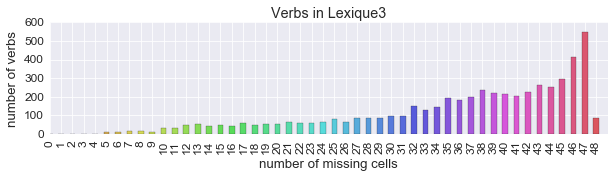

In [156]:
ax=miss49.plot(kind="bar",
               figsize=(10,2),
               color=sns.color_palette("hls", 49),
              )
ax.set(xlim=(0,49),ylim=(0,600),xlabel="number of missing cells",ylabel="number of verbs",title="Verbs in Lexique3")


# Calcul des paradigmes

In [157]:
verbesLex3[verbesLex3["lexeme"]==u"clore"].sort_values("freq",ascending=False)

,ortho,phono,ext,cs,ms,vs,lexeme,freq,prob,case
72103,clos,klo,"z""",K,MS,pp,clore,1.577528e+09,4.569485e-05,ppMS
72105,clos,klo,"z""",V,1S,pi,clore,7.260604e+08,2.103115e-05,pi1S
72111,close,kloz,@,K,FS,pp,clore,4.142840e+08,1.200019e-05,ppFS
72095,clore,klOr,@,V,,inf,clore,3.990007e+08,1.155750e-05,inf
72102,clos,klo,"z""",K,MP,pp,clore,2.288103e+08,6.627744e-06,ppMP
72121,closes,kloz,"@z""",K,FP,pp,clore,1.950000e+08,5.648392e-06,ppFP
72349,clôt,klo,"t""",V,3S,pi,clore,1.780007e+08,5.155989e-06,pi3S
72113,close,kloz,@,V,3S,ps,clore,1.351072e+08,3.913531e-06,ps3S
72106,clos,klo,"z""",V,2S,pI,clore,3.360214e+07,9.733232e-07,pI2S
72116,closent,kloz,"@t""",V,3P,pi,clore,1.400012e+07,4.055290e-07,pi3P


In [161]:
ipaIn = listerUnicode(u"SZNêôârEHO")
ipaOut= [u"ʃ",u"ʒ",u"ŋ",u"ɛ̃",u"ɔ̃",u"ɑ̃",u"ʁ",u"ɛ",u"ɥ",u"ɔ"]
toipa = dict(zip(ipaIn, ipaOut))

S Z N ê ô â r E H O


In [162]:
import unicodedata
def listerUnicode(chaine):
    result=[]
    comb=False
    prec=u""
    for char in chaine:
        print char,
        if unicodedata.combining(char):
            result.append(prec+char)
            prec=""
        else:
            result.append(prec)
            prec=char
    result.append(prec)
    return [r for r in result if r!=""]

def coderIPA(chaine,table=toipa):
    result=chaine
    for k in table:
        result=result.replace(k,table[k])
    return result

In [163]:
print coderIPA(u"êklyrE")

ɛ̃klyʁɛ


In [164]:
def makeTabularParadigme(lexeme,lDF,dictColours,title="",coulLim=False, cat="V"):
    row=lDF[lDF["lexeme"]==lexeme]
    tabular=[]
    def makeValue(case):
        if all(row[case].notnull()):
            return coderIPA(row[case].values[0])
        else:
            return "---"
    def makeLine6(tenseCode):
        line=[tabTemps[tenseCode]]
        for person in [per+nb for nb in ["S","P"] for per in ["1","2","3"]]:
            case=tenseCode+person
            if case in dictColours:
                line.append(r"\cellcolor{%s}%s"%(dictColours[case],makeValue(case)))
            else:
                line.append(r"\cellcolor{%s}%s"%("black",makeValue(case)))
        return r" & ".join(line)+r"\\"

    def makeLine3(tenseCode):
        line=[tabTemps[tenseCode]]
        for person in [per+nb for nb in ["S","P"] for per in ["1","2","3"]]:
            if person in ["2S","1P","2P"]:
                case=tenseCode+person
                if case in dictColours:
                    line.append(r"\cellcolor{%s}%s"%(dictColours[case],makeValue(case)))
                else:
                    line.append(r"\cellcolor{%s}%s"%("black",makeValue(case)))
#                line.append(r"\cellcolor{%s}%s"%(dictColours[case],case))
            else:
                line.append(r"---")
        return r" & ".join(line)+r"\\"
    
    def makeLineNF():
        line=["non-fini"]
        for case in ["inf","pP","ppMS","ppMP","ppFS","ppFP"]:
            if case in dictColours:
                line.append(r"\cellcolor{%s}%s"%(dictColours[case],makeValue(case)))
            else:
                line.append(r"\cellcolor{%s}%s"%("black",makeValue(case)))
#            line.append(r"\cellcolor{%s}%s"%(dictColours[case],case))
        return r" & ".join(line)+r"\\"

    def makeLineMF(nombre):
        line=[]
        for genre in "mf":
            case=genre+nombre
            if case in dictColours:
                line.append(r"\cellcolor{%s}%s"%(dictColours[case],makeValue(case)))
            else:
                line.append(r"\cellcolor{%s}%s"%("black",makeValue(case)))
        return r" & ".join(line)+r"\\"
    
    def makeLineCoulLim():
        line=[]
        for numLimite,limite in enumerate(listLimites):
            line.append(r"\cellcolor{%s}%s"%(listLimCoul[numLimite],"$<$"+str(limite)))
        return r"\hline\hline "+r" & ".join(line)+r"\\"
        
    if cat=="V":
        top=[
            r"\begin{center}",
            r"\begin{tabular}{ccccccc}",
            r"\toprule",
            " & ".join([lexeme]+[p+n for p in "123" for n in ["sg","pl"]])+r"\\",
            r"\midrule"
            ]
        bottom=[
            r"\bottomrule",
            r"\end{tabular}\\",
            title,
            r"\end{center}",
            r"\bigskip",
            r""
            ]
        tabular.append("\n".join(top))
        for tenseCode in ["pi","ii","fi","pc", "ps","ai", "is"]:
            tabular.append(makeLine6(tenseCode))
        tabular.append(makeLine3("pI"))
        tabular.append(makeLineNF())
    elif cat=="A":
        top=[
            r"\begin{center}",
            r"\begin{tabular}{cc}",
            r"\hline"
            ]
        bottom=[
            r"\hline",
            r"\end{tabular}\\",
            title,
            r"\end{center}",
            r"\bigskip",
            r""
            ]
        tabular.append("\n".join(top))
        for number in "sp":
            tabular.append(makeLineMF(number))
    if coulLim:
        tabular.append(makeLineCoulLim())
    tabular.append("\n".join(bottom))
    return "\n".join(tabular)

In [165]:
cases=paradigmes.columns.tolist()
cases.remove("lexeme")
cases

[u'ai1P',
 u'ai1S',
 u'ai2P',
 u'ai2S',
 u'ai3P',
 u'ai3S',
 u'fi1P',
 u'fi1S',
 u'fi2P',
 u'fi2S',
 u'fi3P',
 u'fi3S',
 u'ii1P',
 u'ii1S',
 u'ii2P',
 u'ii2S',
 u'ii3P',
 u'ii3S',
 u'inf',
 u'is1P',
 u'is1S',
 u'is2P',
 u'is2S',
 u'is3P',
 u'is3S',
 u'pI1P',
 u'pI2P',
 u'pI2S',
 u'pP',
 u'pc1P',
 u'pc1S',
 u'pc2P',
 u'pc2S',
 u'pc3P',
 u'pc3S',
 u'pi1P',
 u'pi1S',
 u'pi2P',
 u'pi2S',
 u'pi3P',
 u'pi3S',
 u'ppFP',
 u'ppFS',
 u'ppMP',
 u'ppMS',
 u'ps1P',
 u'ps1S',
 u'ps2P',
 u'ps2S',
 u'ps3P',
 u'ps3S']

In [166]:
etColours=["orange",
           "brown!50",
           "brown",
           "blue!10",
           "yellow!50",
           "blue!25",
           "teal!50",
           "blue!50",
           "cyan!50",
           "lime",
           "pink",
           "magenta!50",
          ]
etCells=[
    ["pi1P","pi2P"]+["ii"+p+n for p in "123" for n in "SP"],
    ["pi3P"],
    ["pi"+p+"S" for p in "123"],
    ["pP"],
    ["pI2S"],
    ["pI1P","pI2P"],
    ["ps"+p+"S" for p in "123"]+["ps3P"],
    ["ps1P","ps2P"],
    ["inf"],
    ["fi"+p+n for p in "123" for n in "SP"]+["pc"+p+n for p in "123" for n in "SP"],
    ["ai"+p+n for p in "123" for n in "SP"]+["is"+p+n for p in "123" for n in "SP"],
    ["pp"+g+n for g in "MF" for n in "SP"],
        ]
tabTemps={
    "pi":u"ind. prs",
    "ii":u"ind. ipf",
    "ai":u"ind. ps",
    "fi":u"ind. fut",
    "ps":u"subj. prs",
    "is":u"subj. ipf",
    "pc":u"cond. prs",
    "pI":u"imper. prs",
    "inf":u"non-fini"
    }
dictEtColours={}
for nET,ET in enumerate(etCells):
    for c in ET:
        dictEtColours[c]=etColours[nET]
dictEtColours

{'ai1P': 'pink',
 'ai1S': 'pink',
 'ai2P': 'pink',
 'ai2S': 'pink',
 'ai3P': 'pink',
 'ai3S': 'pink',
 'fi1P': 'lime',
 'fi1S': 'lime',
 'fi2P': 'lime',
 'fi2S': 'lime',
 'fi3P': 'lime',
 'fi3S': 'lime',
 'ii1P': 'orange',
 'ii1S': 'orange',
 'ii2P': 'orange',
 'ii2S': 'orange',
 'ii3P': 'orange',
 'ii3S': 'orange',
 'inf': 'cyan!50',
 'is1P': 'pink',
 'is1S': 'pink',
 'is2P': 'pink',
 'is2S': 'pink',
 'is3P': 'pink',
 'is3S': 'pink',
 'pI1P': 'blue!25',
 'pI2P': 'blue!25',
 'pI2S': 'yellow!50',
 'pP': 'blue!10',
 'pc1P': 'lime',
 'pc1S': 'lime',
 'pc2P': 'lime',
 'pc2S': 'lime',
 'pc3P': 'lime',
 'pc3S': 'lime',
 'pi1P': 'orange',
 'pi1S': 'brown',
 'pi2P': 'orange',
 'pi2S': 'brown',
 'pi3P': 'brown!50',
 'pi3S': 'brown',
 'ppFP': 'magenta!50',
 'ppFS': 'magenta!50',
 'ppMP': 'magenta!50',
 'ppMS': 'magenta!50',
 'ps1P': 'blue!50',
 'ps1S': 'teal!50',
 'ps2P': 'blue!50',
 'ps2S': 'teal!50',
 'ps3P': 'teal!50',
 'ps3S': 'teal!50'}

In [167]:
print makeTabularParadigme(u"bruiter",paradigmes,dictEtColours)

\begin{center}
\begin{tabular}{ccccccc}
\toprule
bruiter & 1sg & 1pl & 2sg & 2pl & 3sg & 3pl\\
\midrule
ind. prs & \cellcolor{brown}--- & \cellcolor{brown}--- & \cellcolor{brown}--- & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{brown!50}---\\
ind. ipf & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}---\\
ind. fut & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}---\\
cond. prs & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}---\\
subj. prs & \cellcolor{teal!50}--- & \cellcolor{teal!50}--- & \cellcolor{teal!50}--- & \cellcolor{blue!50}--- & \cellcolor{blue!50}--- & \cellcolor{teal!50}---\\
ind. ps & \cellcolor{pink}--- & \cellcolor{pink}--- & \cellcolor{pink}bʁɥita & \cellcolor{pink}--- & \cellcolor{pink}--- & \cellcolor{pink

In [168]:
testCase="pi3S"
testFin="o"
testParadigmes=paradigmes[(paradigmes[testCase].notnull())&(paradigmes[testCase].str.endswith(testFin))]
testListe=testParadigmes["lexeme"].tolist()
testParadigmes

case,lexeme,ai1P,ai1S,ai2P,ai2S,ai3P,ai3S,fi1P,fi1S,fi2P,...,ppFP,ppFS,ppMP,ppMS,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S
895,clore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,kloz,kloz,klo,klo,NaN,kloz,NaN,NaN,NaN,kloz
2302,falloir,NaN,NaN,NaN,NaN,NaN,faly,NaN,NaN,NaN,...,NaN,NaN,NaN,faly,NaN,NaN,NaN,NaN,NaN,NaN
3713,prévaloir,NaN,NaN,NaN,NaN,NaN,prEvaly,NaN,NaN,NaN,...,NaN,NaN,NaN,prEvaly,NaN,NaN,NaN,NaN,NaN,NaN
5050,valoir,NaN,NaN,NaN,NaN,valyr,valy,vOdrô,vOdrE,vOdre,...,valy,valy,NaN,valy,NaN,vaj,NaN,NaN,vaj,vaj
5326,équivaloir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Ekivaly,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
for lexeme in testListe:
    print makeTabularParadigme(lexeme,paradigmes,dictEtColours)
    

\begin{center}
\begin{tabular}{ccccccc}
\toprule
clore & 1sg & 1pl & 2sg & 2pl & 3sg & 3pl\\
\midrule
ind. prs & \cellcolor{brown}klo & \cellcolor{brown}--- & \cellcolor{brown}klo & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{brown!50}kloz\\
ind. ipf & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}---\\
ind. fut & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}klɔʁa & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}---\\
cond. prs & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}---\\
subj. prs & \cellcolor{teal!50}kloz & \cellcolor{teal!50}--- & \cellcolor{teal!50}kloz & \cellcolor{blue!50}--- & \cellcolor{blue!50}--- & \cellcolor{teal!50}---\\
ind. ps & \cellcolor{pink}--- & \cellcolor{pink}--- & \cellcolor{pink}--- & \cellcolor{pink}--- & \cellcolor{pink}--- & \cellcolor{pink

In [171]:
paradigmes[paradigmes["lexeme"].str.endswith("ore")]

case,lexeme,ai1P,ai1S,ai2P,ai2S,ai3P,ai3S,fi1P,fi1S,fi2P,...,ppFP,ppFS,ppMP,ppMS,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S
895,clore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,kloz,kloz,klo,klo,NaN,kloz,NaN,NaN,NaN,kloz
1449,déclore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,dEkloz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,enclore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,âkloz,âkloz,âklo,âklo,NaN,NaN,NaN,NaN,NaN,NaN
5200,éclore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ekloz


In [172]:
nomLex=repDATA+"Longitudinal-50-T600000-F33424-X-paradigmes.csv"
dfLex=pd.read_csv(nomLex,sep=";",index_col=0,encoding="utf8")
nomSwim2=repDATA+"Longitudinal-50-T600000-F33424-X-paradigmes-Swim2.csv"
dfSwim2=pd.read_csv(nomSwim2,sep=";",index_col=0,encoding="utf8")

In [173]:
lexeme=u"clore"
print makeTabularParadigme(lexeme,dfLex,dictEtColours)
print makeTabularParadigme(lexeme,dfSwim2,dictEtColours)

\begin{center}
\begin{tabular}{ccccccc}
\toprule
clore & 1sg & 1pl & 2sg & 2pl & 3sg & 3pl\\
\midrule
ind. prs & \cellcolor{brown}klo & \cellcolor{brown}--- & \cellcolor{brown}klo & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{brown!50}---\\
ind. ipf & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}--- & \cellcolor{orange}---\\
ind. fut & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}---\\
cond. prs & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}--- & \cellcolor{lime}---\\
subj. prs & \cellcolor{teal!50}--- & \cellcolor{teal!50}--- & \cellcolor{teal!50}--- & \cellcolor{blue!50}--- & \cellcolor{blue!50}--- & \cellcolor{teal!50}---\\
ind. ps & \cellcolor{pink}--- & \cellcolor{pink}--- & \cellcolor{pink}--- & \cellcolor{pink}--- & \cellcolor{pink}--- & \cellcolor{pink}---\

In [223]:
def plotFamille(famille,gParadigme,ylim=None,width=1,yscale="linear",lPalette="hls"):
#    dfAX=(gParadigme[gParadigme["lexeme"].isin(famille)].set_index("lexeme").loc[famille][cases].T)
    dfAX=(gParadigme[gParadigme["lexeme"].isin(famille)].set_index("lexeme").T)
    ax=dfAX.plot(kind="bar",
                 figsize=(20,3),
                 width=width,
                 color=sns.color_palette(lPalette),
                )
    colorerXTicks(ax)
    ax.set(yscale=yscale,ylabel=u"tokens per million words")
    ax.legend(loc="upper left")
    if ylim:
        ax.set_ylim([0,ylim])
    jointFamille="".join([l.capitalize() for l in famille])
    if yscale=="linear":
        strScale=""
    else:
        strScale=yscale.capitalize()+"-"
#    plt.savefig(repHDR+u'Lex3-BP-%s%s-Verbes.pdf'%(strScale,jointFamille), dpi=300, bbox_inches="tight")
    plt.show()

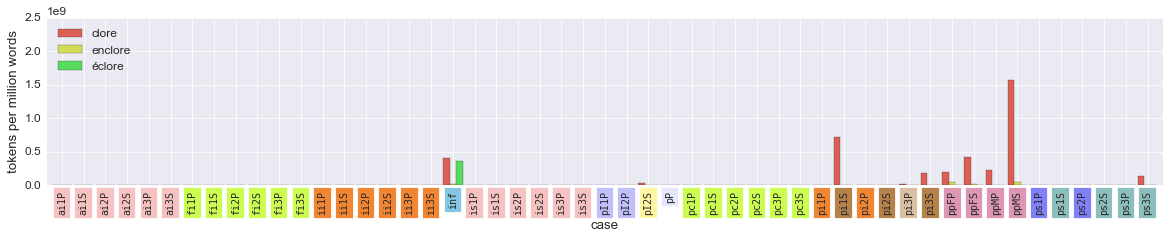

In [230]:
famille=u"clore, éclore, enclore".split(", ")
plotFamille(famille,paradigmesFreq,width=.9,
            ylim=2.5E9,
           )


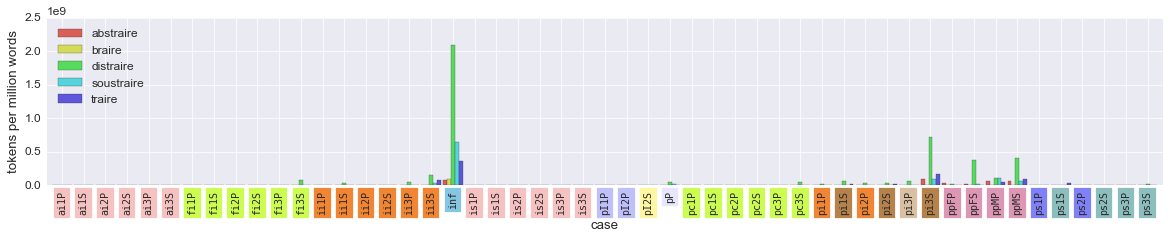

In [231]:
famille=u"braire, traire, abstraire, distraire, soustraire".split(", ")
plotFamille(famille,paradigmesFreq,width=.9,
            ylim=2.5E9,
           )


In [202]:
dfAX=paradigmesFreq[paradigmesFreq["lexeme"].isin(famille)].set_index("lexeme").T
dfAX

lexeme,clore,déclore,enclore,éclore
case,,,,
ai1P,NaN,NaN,NaN,NaN
ai1S,NaN,NaN,NaN,NaN
ai2P,NaN,NaN,NaN,NaN
ai2S,NaN,NaN,NaN,NaN
ai3P,NaN,NaN,NaN,NaN
ai3S,NaN,NaN,NaN,NaN
fi1P,NaN,NaN,NaN,NaN
fi1S,NaN,NaN,NaN,NaN
fi2P,NaN,NaN,NaN,NaN


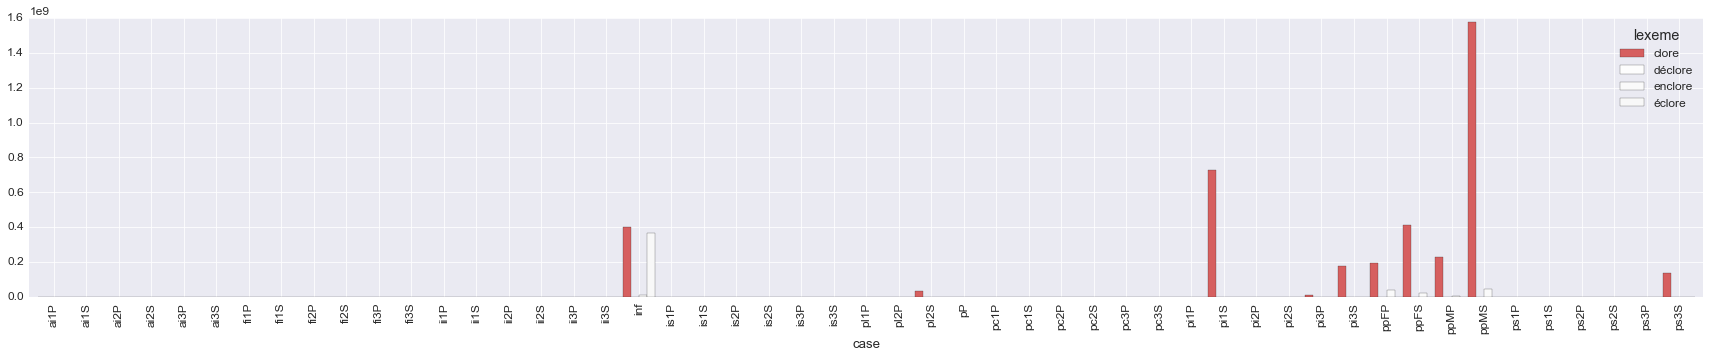

In [203]:
ax=dfAX.plot(kind="bar",
             figsize=(30,5),
             width=1,
             color=["r"]+sns.color_palette("Greys",n_colors=len(dfAX)-1),
            )